# Precio de automóviles de diferentes compañías

Imaginémonos que tenemos un dataset en el cual tenemos como columnas: 

$$
\begin{matrix}
   \text{Fabricante} & \text{Modelo} & \text{Año} & \text{Tamaño del motor} & \text{Kilometraje} & \text{Tipo de energía} & \text{Transmisión} & \text{Precio} \\
\end{matrix}
$$

Entre las preguntas que uno se podría hacer yo voy a responder las siguientes: 

1) ¿Cuál es el precio promedio por marca de cada modelo? (Es decir, el promedio del precio de un modelo a través de los años)
2) ¿Cómo varía el precio de un auto con respecto al kilometraje del mismo? 
3) ¿Cómo varía el precio de un auto con respecto al tamaño del motor? 

In [8]:
import numpy as np 
import pandas as pd 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("E:\Downloads\Car_Price_Prediction.csv",sep = ",")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\agus\AppData\Local\Temp\ipykernel_17012\1013003435.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Downloads\Car_Price_Prediction.csv",sep = ",")


,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


## 1) 

Primero voy a armarme un nuevo dataset en el cual tengo como columnas al fabricante, el modelo y el precio promedio. Luego, hago una pivot table en el cual voy a dividir por fabricantes y voy a tomar como columnas los distintos modelos y como valores al precio promedio. Finalmente, hago un gráfico de barras. 

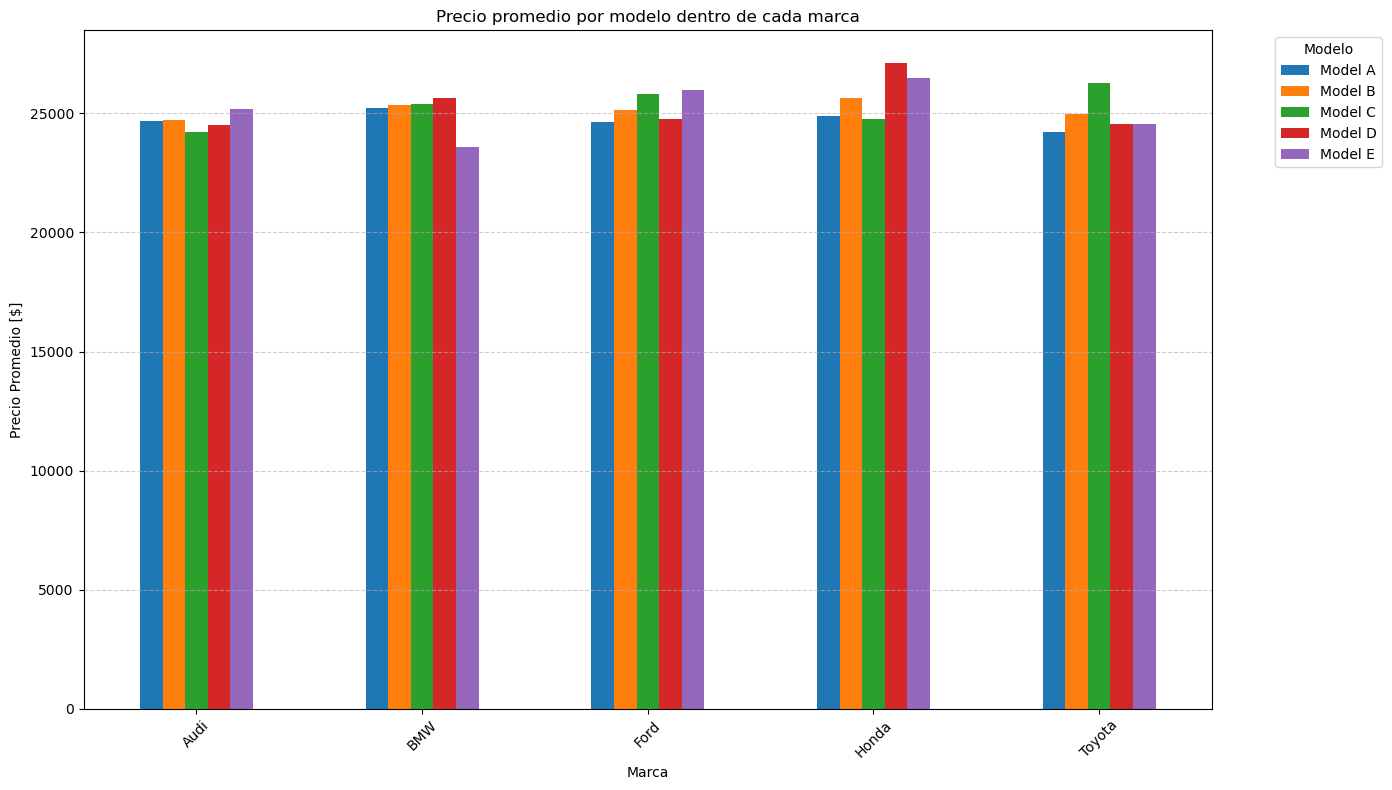

In [3]:
grupos_df = df.groupby(["Make","Model"])["Price"].mean().reset_index()
pivot_df = grupos_df.pivot(index="Make",columns="Model",values="Price")
pivot_df.plot(kind="bar",figsize=(14,8))
plt.title('Precio promedio por modelo dentro de cada marca')
plt.xlabel('Marca')
plt.ylabel('Precio Promedio [$]')
plt.xticks(rotation=45)
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

## 2) y 3)

In [4]:
print(df["Fuel Type"].unique())
print(df["Transmission"].unique())
kilometraje = df["Mileage"]
precio =df["Price"]
motor = df["Engine Size"]

['Petrol' 'Electric' 'Diesel']
['Manual' 'Automatic']


Voy a graficar el valor de los autos en función de su kilometraje y en función del tamaño del motor, distinguiendo los distintos tipos de energías (naftero,diesel,eléctrico) y los distintos tipos de transmisiones (manual,automático): 

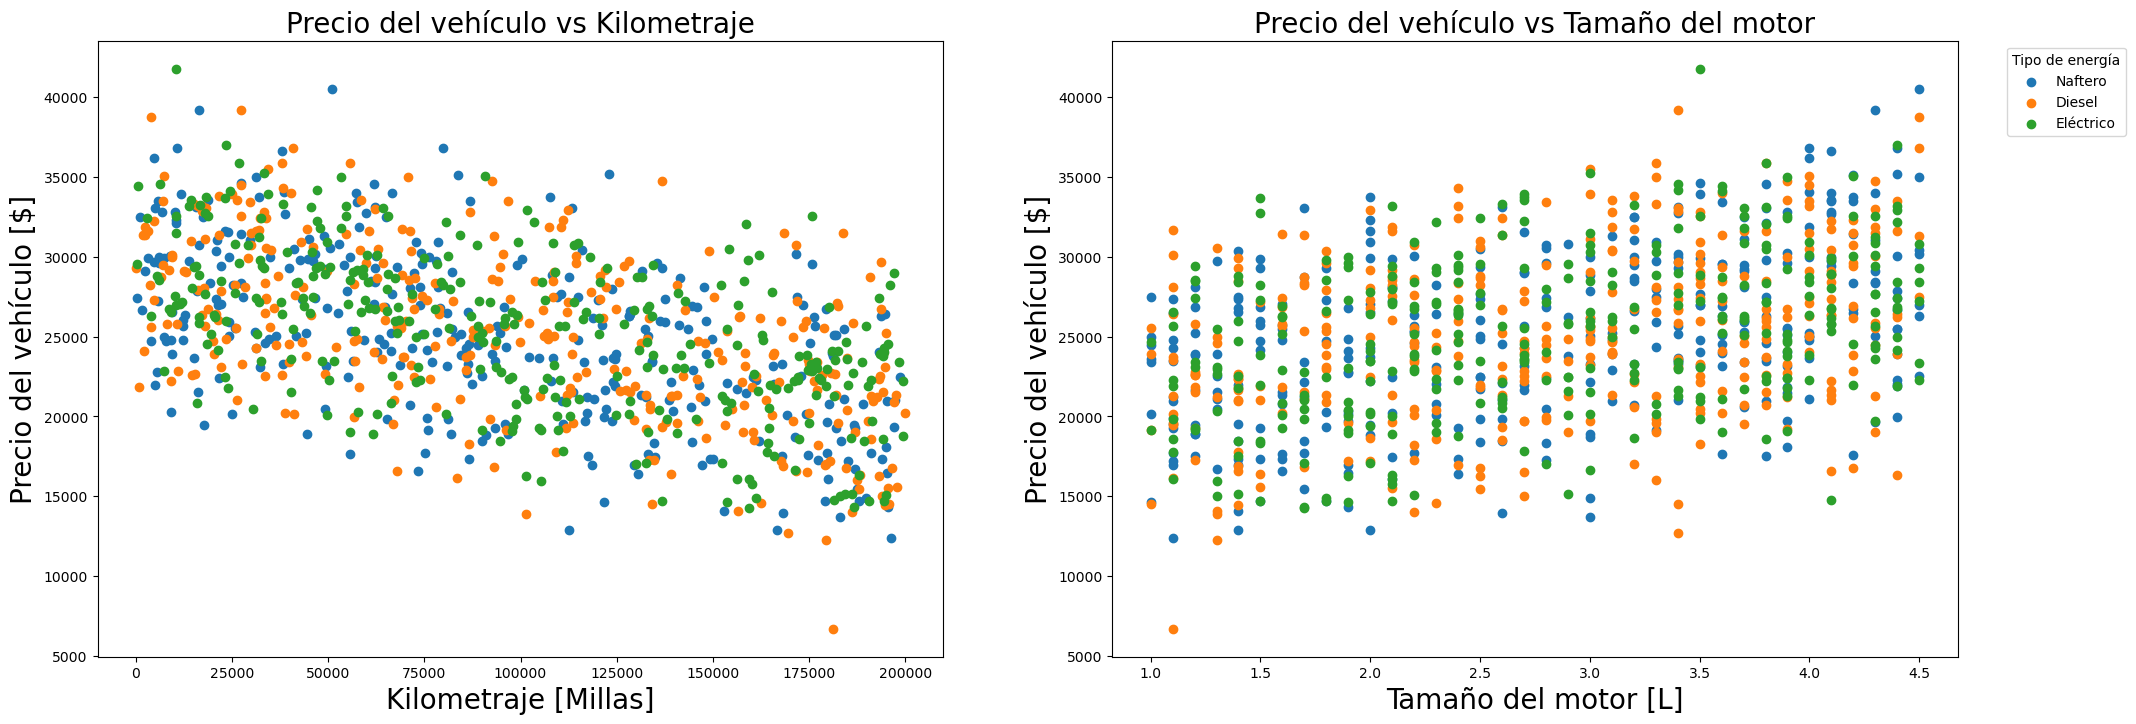

In [5]:
fig,ax = plt.subplots(1,2,figsize=(24,8))

ax[0].scatter(df[df["Fuel Type"] == "Petrol"]["Mileage"],df[df["Fuel Type"] == "Petrol"]["Price"],label="Naftero")
ax[0].scatter(df[df["Fuel Type"] == "Diesel"]["Mileage"],df[df["Fuel Type"] == "Diesel"]["Price"],label="Diesel")
ax[0].scatter(df[df["Fuel Type"] == "Electric"]["Mileage"],df[df["Fuel Type"] == "Electric"]["Price"],label="Eléctrico")
ax[0].set_title("Precio del vehículo vs Kilometraje",fontsize=20)
ax[0].set_xlabel("Kilometraje [Millas]",fontsize=20)
ax[0].set_ylabel("Precio del vehículo [$]",fontsize=20)

ax[1].scatter(df[df["Fuel Type"] == "Petrol"]["Engine Size"],df[df["Fuel Type"] == "Petrol"]["Price"],label="Naftero")
ax[1].scatter(df[df["Fuel Type"] == "Diesel"]["Engine Size"],df[df["Fuel Type"] == "Diesel"]["Price"],label="Diesel")
ax[1].scatter(df[df["Fuel Type"] == "Electric"]["Engine Size"],df[df["Fuel Type"] == "Electric"]["Price"],label="Eléctrico")
ax[1].set_title("Precio del vehículo vs Tamaño del motor",fontsize=20)
ax[1].set_xlabel("Tamaño del motor [L]",fontsize=20)
ax[1].set_ylabel("Precio del vehículo [$]",fontsize=20)
ax[1].legend(title='Tipo de energía', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10)

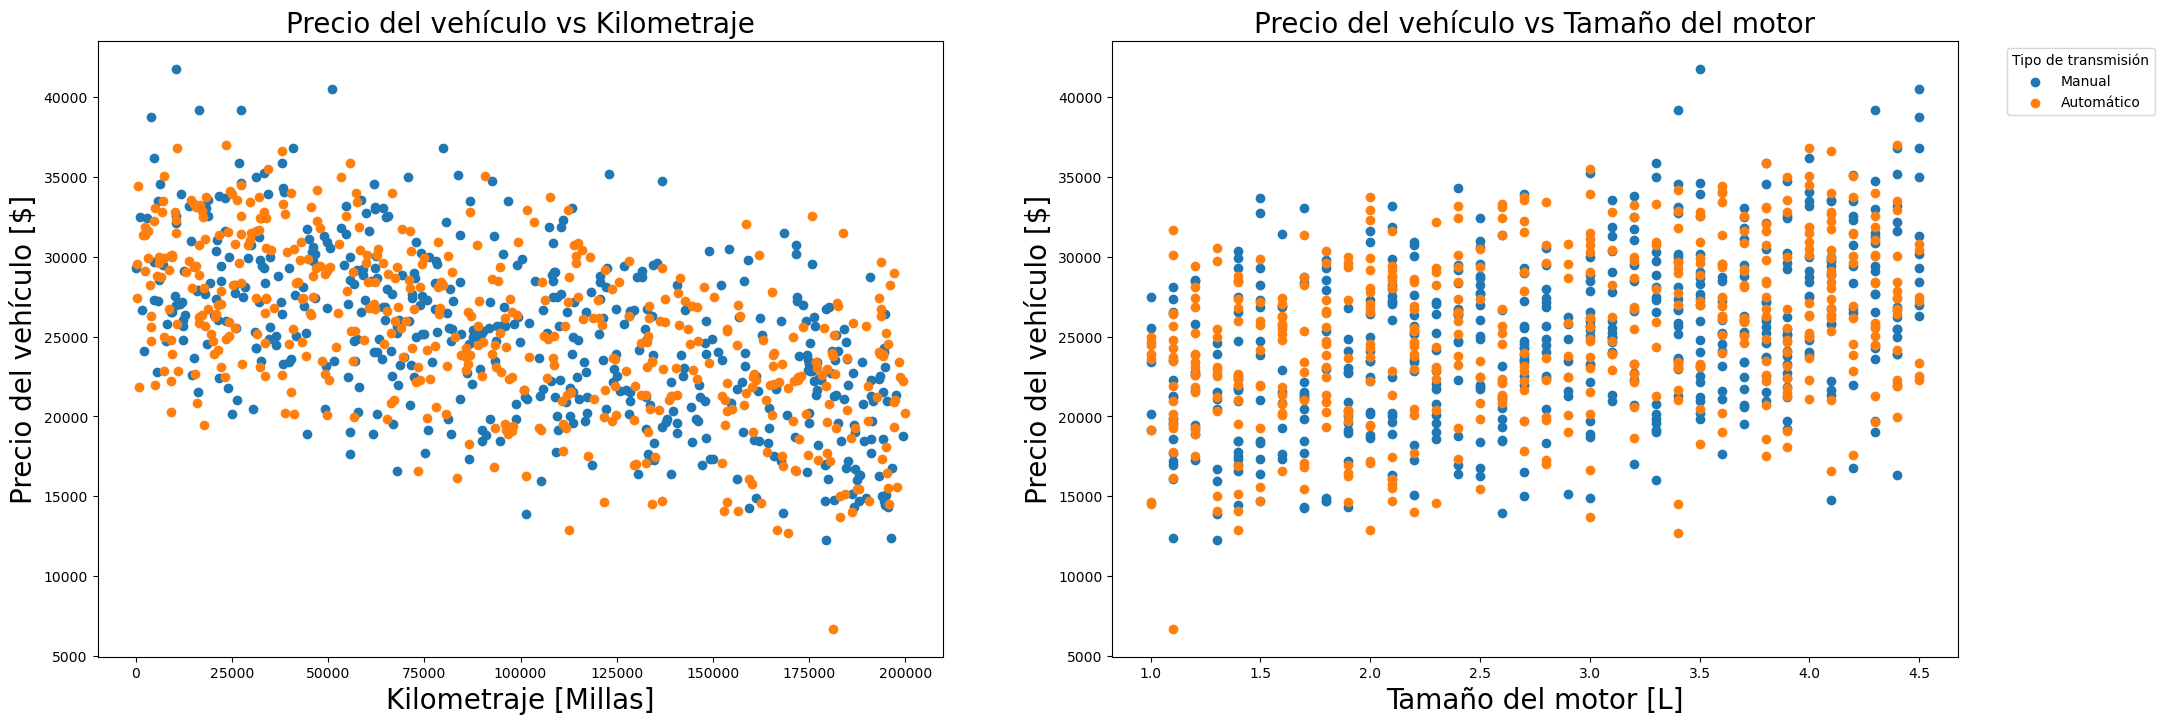

In [6]:
fig,ax = plt.subplots(1,2,figsize=(24,8))

ax[0].scatter(df[df["Transmission"] == "Manual"]["Mileage"],df[df["Transmission"] == "Manual"]["Price"],label="Manual")
ax[0].scatter(df[df["Transmission"] == "Automatic"]["Mileage"],df[df["Transmission"] == "Automatic"]["Price"],label="Automatic")
ax[0].set_title("Precio del vehículo vs Kilometraje",fontsize=20)
ax[0].set_xlabel("Kilometraje [Millas]",fontsize=20)
ax[0].set_ylabel("Precio del vehículo [$]",fontsize=20)

ax[1].scatter(df[df["Transmission"] == "Manual"]["Engine Size"],df[df["Transmission"] == "Manual"]["Price"],label="Manual")
ax[1].scatter(df[df["Transmission"] == "Automatic"]["Engine Size"],df[df["Transmission"] == "Automatic"]["Price"],label="Automático")
ax[1].set_title("Precio del vehículo vs Tamaño del motor",fontsize=20)
ax[1].set_xlabel("Tamaño del motor [L]",fontsize=20)
ax[1].set_ylabel("Precio del vehículo [$]",fontsize=20)
ax[1].legend(title='Tipo de transmisión', bbox_to_anchor=(1.05, 1), loc='upper left')

Provisto de que la relación entre el precio de los vehículos con el kilometraje y con el tamaño del motor parece ser lineal voy a hacer una regresión lineal. Esto me va a permitir aproximar lo que aumenta/disminuye al precio al variar un poco el kilometraje o el tamaño del motor. 

Si el kilometraje sube 1 milla, entonces el precio del vehículo baja 0.048509502734299804
Si el tamaño del motor sube 0.1 L, entonces el precio del vehículo sube 194.2520621882562


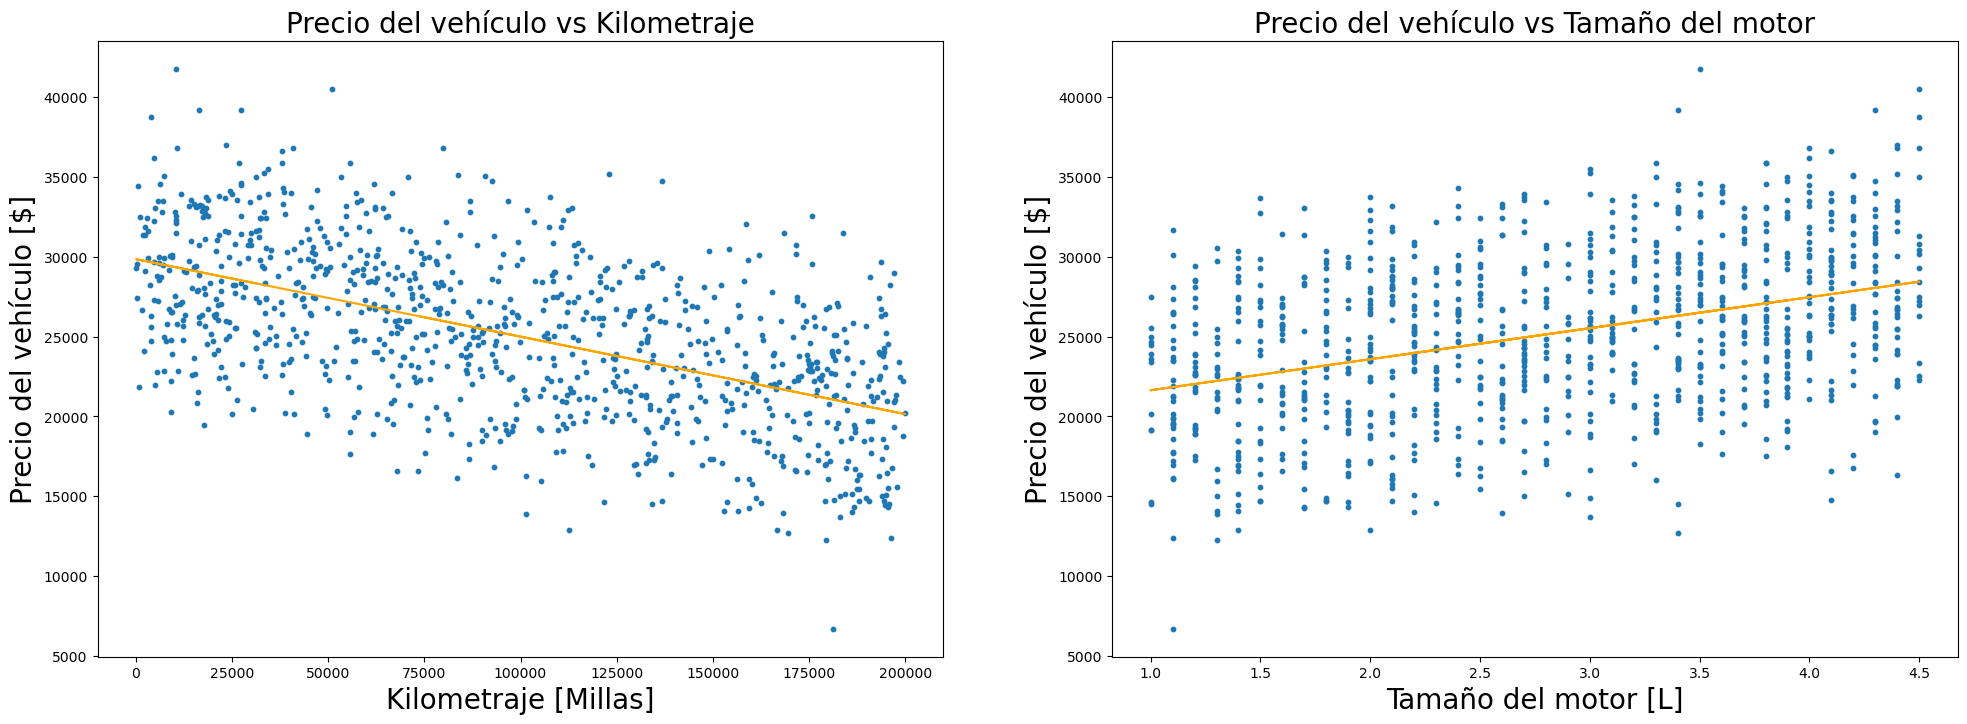

In [22]:
def lineal(x,m,b):
    return m*x+b

popt_k,pcov_k = curve_fit(lineal,kilometraje,precio)
popt_m,pcov_m = curve_fit(lineal,motor,precio)


fig,ax = plt.subplots(1,2,figsize=(24,8))
ax[0].scatter(kilometraje,precio,s=10)
ax[0].plot(kilometraje,lineal(kilometraje,*popt_k),color="orange")
ax[0].set_title("Precio del vehículo vs Kilometraje",fontsize=20)
ax[0].set_xlabel("Kilometraje [Millas]",fontsize=20)
ax[0].set_ylabel("Precio del vehículo [$]",fontsize=20)

ax[1].scatter(motor,precio,s=10)
ax[1].plot(motor,lineal(motor,*popt_m),color="orange")
ax[1].set_title("Precio del vehículo vs Tamaño del motor",fontsize=20)
ax[1].set_xlabel("Tamaño del motor [L]",fontsize=20)
ax[1].set_ylabel("Precio del vehículo [$]",fontsize=20)

print("Si el kilometraje sube 1 milla, entonces el precio del vehículo baja " +str(-popt_k[0]))
print("Si el tamaño del motor sube 0.1 L, entonces el precio del vehículo sube " +str(0.1*popt_m[0]))

Como se puede observar en el print arriba de las figuras, si el kilometraje del auto sube 1 milla entonces el precio del vehículo baja $\sim$ 0.05 \$ mientras que si el tamaño del motor aumenta 0.1 L entonces el precio del vehículo sube $\sim$ 194 \$. En las figuras se puede observar que las lineales no ajustan de manera correcta los datos que tenemos y esto es porque la relación no es estrictamente lineal. Lo que sí sucederá es que si hacemos un promedio entre los valores que tengan kilometraje/tamaño del motor cercano y hacemos el mismo ajuste entonces vamos a tener que la lineal ajusta de manera correcta a los datos. 